# Kaggle house price predictions

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


## Explore

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Numerical Features

In [5]:
numeric_features = train.select_dtypes(include=[np.number])  # returns a sub set of the columns
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

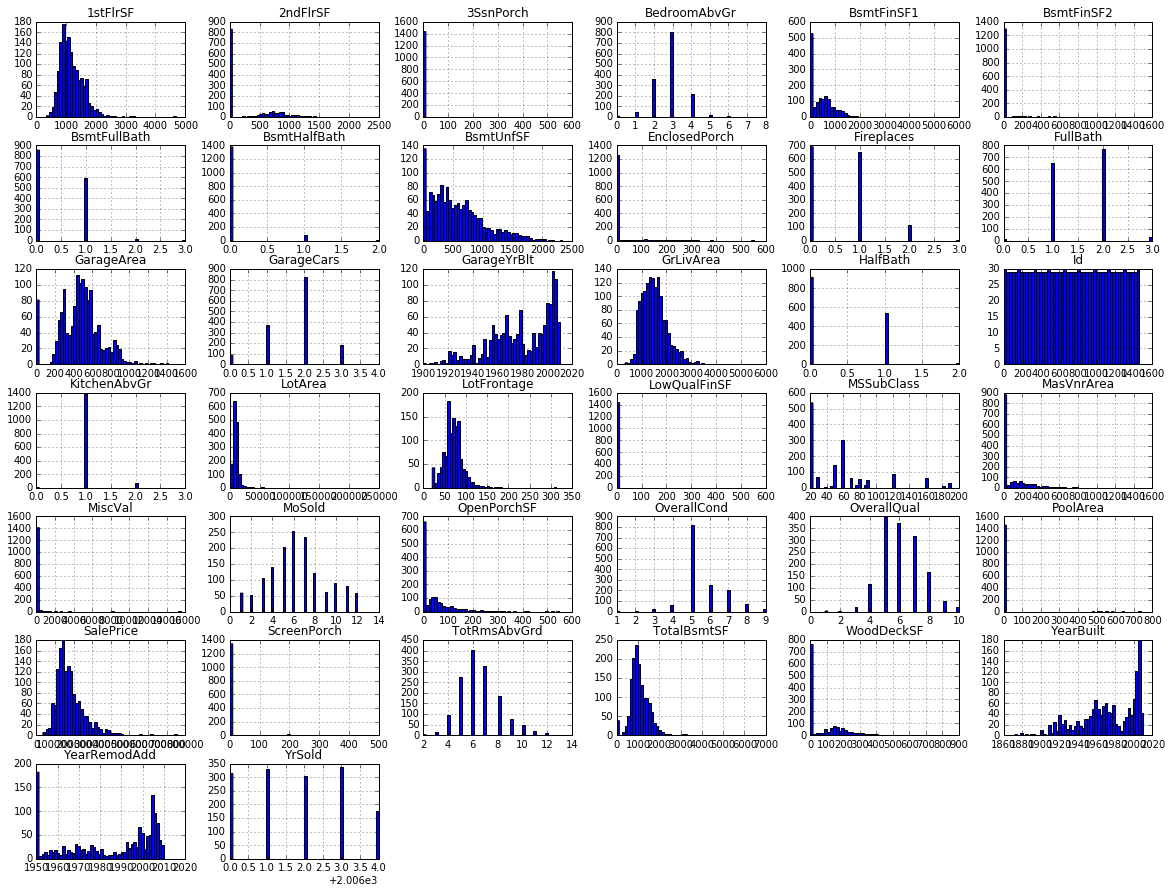

In [6]:
numeric_features.hist(bins=50, figsize=(20,15));
plt.show()

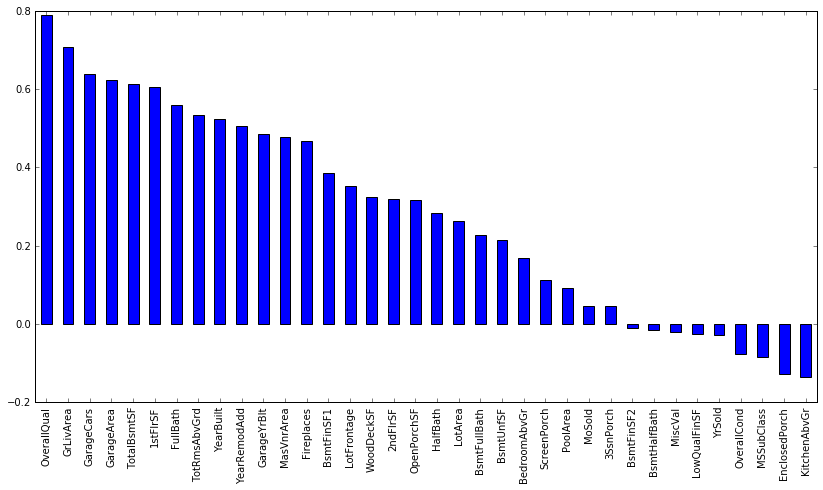

In [7]:
corr_with_SalePrice = train.drop(["Id"], axis=1).corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(14,7))
corr_with_SalePrice.drop("SalePrice").plot.bar()
plt.show()

del corr_with_SalePrice

### Categorical Data

In [8]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

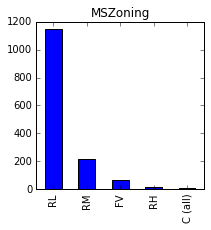

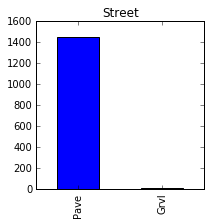

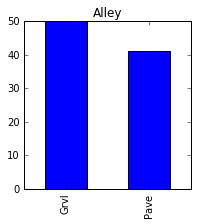

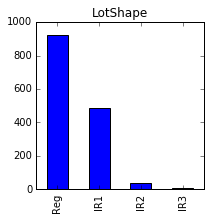

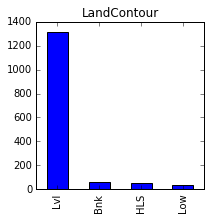

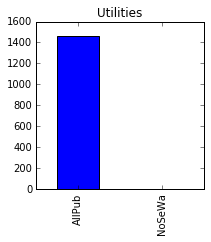

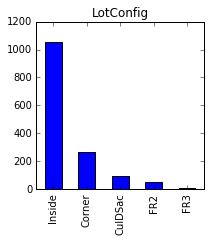

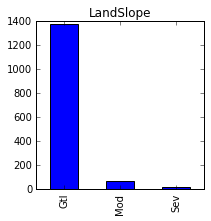

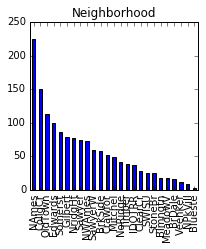

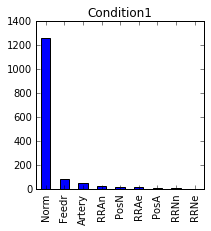

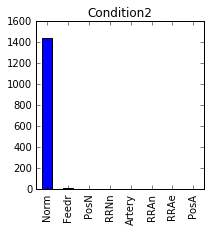

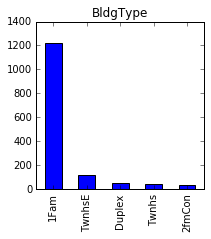

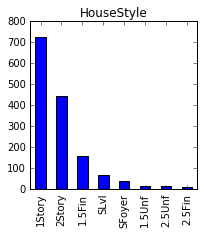

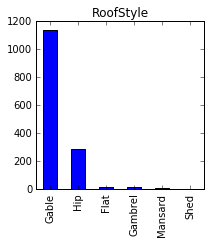

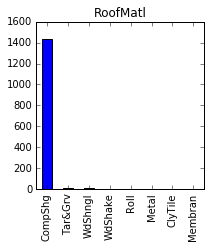

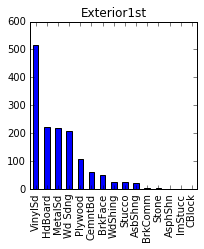

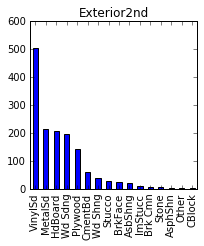

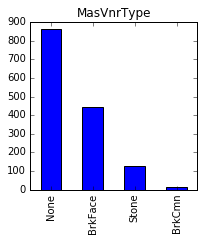

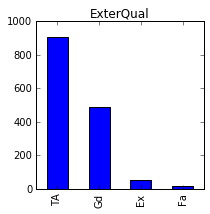

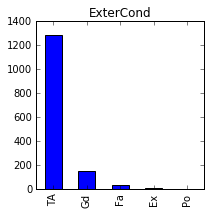

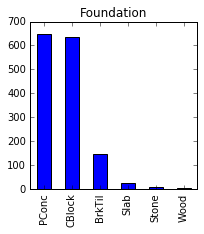

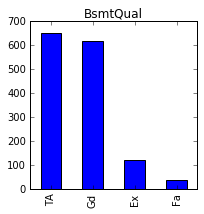

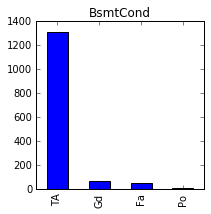

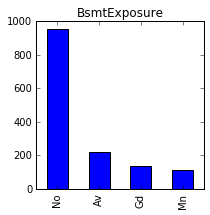

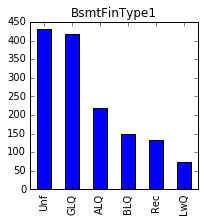

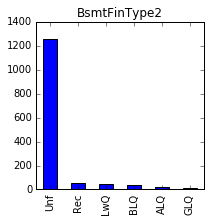

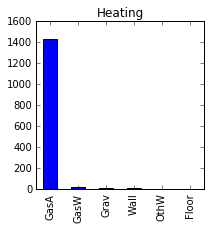

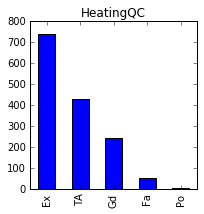

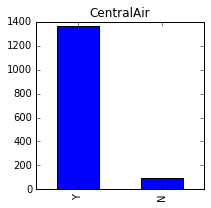

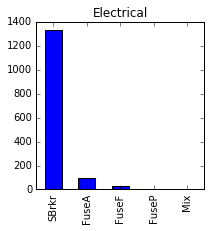

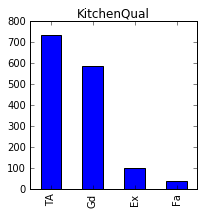

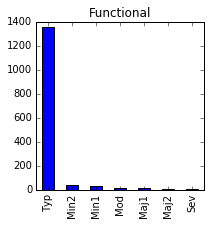

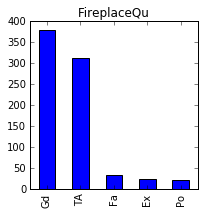

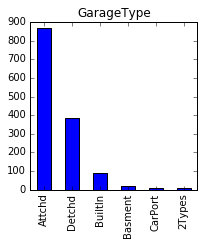

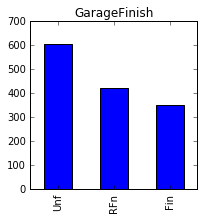

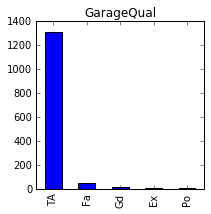

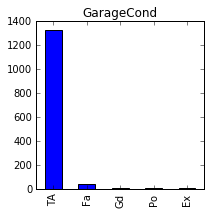

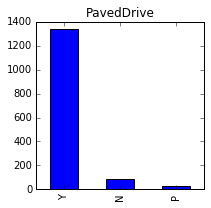

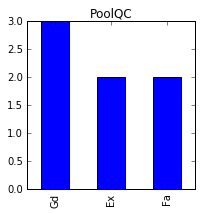

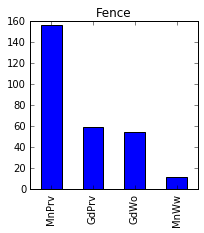

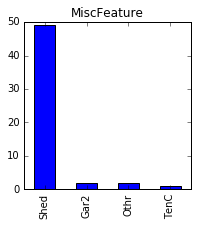

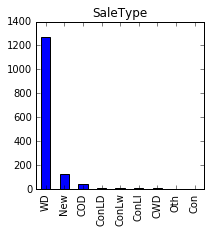

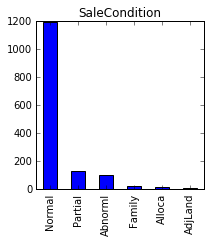

In [9]:
for col in categoricals:
    train[col].value_counts().plot(kind='bar', figsize=(3,3), title=col)
    plt.show()


## Engineer Features

### Sale Price

In [10]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew: 1.88287575977


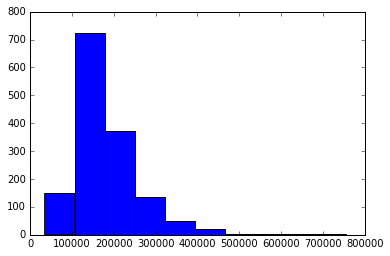

In [11]:
print ("Skew:", train.SalePrice.skew())
plt.hist(train.SalePrice)
plt.show()

Skewness is a measure of the shape of the distribution of values. +ve due to the long tail on the right.

In [12]:
# train.SalePrice = np.log(train.SalePrice)
# # test.SalePrice = np.log(test.SalePrice)
# print ("Skew:", train.SalePrice.skew())
# plt.hist(train.SalePrice)
# plt.show()

### Deal with nulls
Get rid of cols with > 1/3 nulls

In [13]:
null_values_per_col = np.sum(train.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)

max_na = int(2*train.shape[0]/3.0)
cols_to_remove = []

for col in train.drop(["Id","SalePrice"],axis=1).columns.tolist():
    if null_values_per_col[col] > max_na: 
        cols_to_remove.append(col)
        train.drop(col, axis=1, inplace=True)
        test.drop(col, axis=1, inplace=True)
        
print("New shape of the training set is: (%d,%d)" %train.shape)        
print("The removed columns are:")
for column in cols_to_remove:
    print(column, "Dropped because it has %d missing values" %null_values_per_col[column])

New shape of the training set is: (1460,77)
The removed columns are:
Alley Dropped because it has 1369 missing values
PoolQC Dropped because it has 1453 missing values
Fence Dropped because it has 1179 missing values
MiscFeature Dropped because it has 1406 missing values


In [14]:
#Impute the rest of the null values
null_test = np.sum(test.isnull(), axis=0) 
for col, null_vals in null_test.iteritems():
    if null_vals != 0:        
        if (test[col].dtype == 'float64' ) or  (test[col].dtype == 'int64'):
            test[col].fillna(value = np.nanmedian(test[col]), inplace = True)
            train[col].fillna(value = np.nanmedian(test[col]), inplace = True)
        else:
            test[col].fillna(value = test[col].value_counts().argmax(), inplace = True)
            train[col].fillna(value = test[col].value_counts().argmax(), inplace = True)
        
print("Number of missing values in test set after second round of imputation " ,
      np.sum( np.sum(test.isnull(), axis= 0)) )   

del null_test

Number of missing values in test set after second round of imputation  0


In [15]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 77)
Test data shape: (1459, 76)


In [16]:
# UnSkew all fields
# numeric_features = train.select_dtypes(include=[np.number]) 

# from scipy.stats import skew
# skewed_feats = numeric_features.apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index

# train[skewed_feats] = np.log1p(train[skewed_feats])

In [17]:
# Impute the ordered categorical features
# from - https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
my_replace = {"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
train = train.replace(my_replace)
test = test.replace(my_replace)

### Dimensionality Reduction
TODO

### Field Garage Area

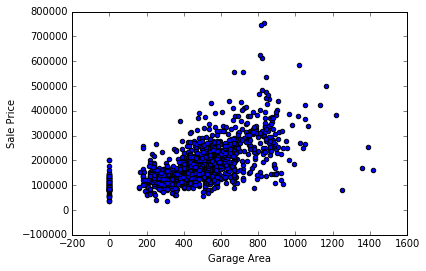

In [18]:
plt.scatter(x=train['GarageArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [19]:
train = train[train['GarageArea'] < 1200]

Basement SqFt

In [20]:
# plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
# plt.ylabel('Sale Price')
# plt.xlabel('GrLivArea')
# plt.show()

In [21]:
# train = train[train['GrLivArea'] < 4000]

### Field: Sale Condition

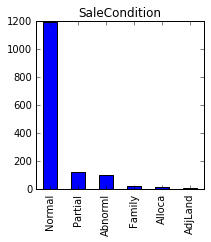

In [22]:
train.SaleCondition.value_counts().plot(kind='bar', figsize=(3,3), title=col);

In [23]:
def encode(x):
    return 1 if x == 'Partial' else 0

train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

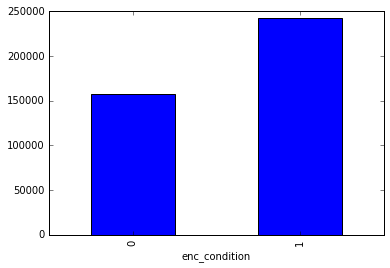

In [24]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')

### Field: Neighbourhood

In [25]:
# def encode_neighborhood(x):
#     return 1 if (x == 'NoRidge' or x == 'NridgHt' or x == 'StoneBr') else 0

# train['enc_neighborhood'] = train.Neighborhood.apply(encode_neighborhood)
# test['enc_neighborhood'] = test.Neighborhood.apply(encode_neighborhood)

### Field: 1st Floor SqFoot

In [26]:
def encode_1stFlrSf(x):
    return np.log(x)

train['enc_1stFlrSF'] = train['1stFlrSF'].apply(encode_1stFlrSf)
test['enc_1stFlrSF'] = test['1stFlrSF'].apply(encode_1stFlrSf)

### Field: MS Zoning

In [27]:
train['MSZoning'].value_counts()

RL         1147
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64

In [28]:
train.pivot_table(index='MSZoning', values='SalePrice', aggfunc=np.median)

MSZoning
C (all)     68400
FV         205950
RH         136500
RL         174000
RM         120500
Name: SalePrice, dtype: int64

In [29]:
train_mszoning = pd.get_dummies(train['MSZoning'])
train = pd.concat([train, train_mszoning], axis=1)

test_mszoning = pd.get_dummies(test['MSZoning'])
test = pd.concat([test, test_mszoning], axis=1)

### Field: Lot Shape

In [30]:
train['LotShape'].fillna('Reg')
train_lot_shape = pd.get_dummies(train['LotShape'])
train = pd.concat([train, train_lot_shape], axis=1)

test['LotShape'].fillna('Reg')
test_lot_shape = pd.get_dummies(test['LotShape'])
test = pd.concat([test, test_lot_shape], axis=1)

### Field: Neighborhood

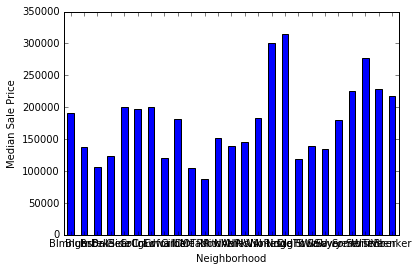

In [31]:
neighbourhood_pivot = train.pivot_table(index='Neighborhood',
                                    values='SalePrice', aggfunc=np.median)
neighbourhood_pivot.plot(kind='bar', color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [32]:
neighbourhood_pivot

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    120000
Gilbert    181000
IDOTRR     104750
MeadowV     88000
Mitchel    152200
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64

In [33]:
# NoRidge    301500
# NridgHt    315000
# def encode_neighborhood(x):
#     return 1 if (x == 'NoRidge' or x == 'NridgHt' or x == 'StoneBr') else 0

# train['enc_neighborhood'] = train.Neighborhood.apply(encode_neighborhood)
# test['enc_neighborhood'] = test.Neighborhood.apply(encode_neighborhood)

train['Neighborhood'].fillna('Gilbert')
train_lot_shape = pd.get_dummies(train['LotShape'])
train = pd.concat([train, train_lot_shape], axis=1)

test['Neighborhood'].fillna('Gilbert')
test_lot_shape = pd.get_dummies(test['LotShape'])
test = pd.concat([test, test_lot_shape], axis=1)

### Field: Street

In [34]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [35]:
print (train.enc_street.value_counts())

1    1450
0       5
Name: enc_street, dtype: int64


### Field: Sale Condition

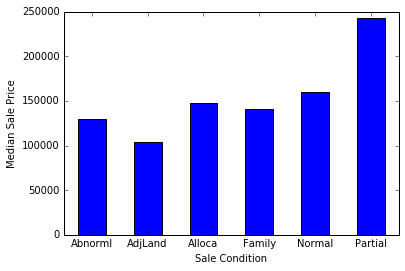

In [36]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [37]:
def encode(x):
    return 1 if x == 'Partial' else 0

train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

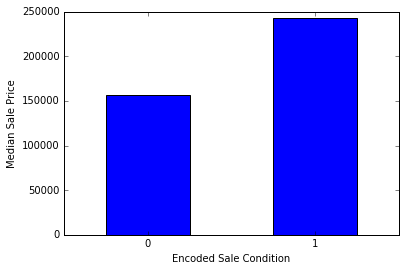

In [38]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [39]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1455, 93)
Test data shape: (1459, 92)


## Model

Build a model

In [40]:
data = train.select_dtypes(include=[np.number])
y = np.log(train.SalePrice)  # Target variable
X = data.drop(['SalePrice', 'Id'], axis=1)  # Features    f(X) = y

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

### Linear Model

In [42]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
linreg = linear_model.LinearRegression(n_jobs=-1)

linreg_model = linreg.fit(X_train, y_train)

In [43]:
predictions = linreg_model.predict(X_test)
rsq = linreg_model.score(X_test, y_test)
rmse = mean_squared_error(y_test, predictions)
print ("R^2 is: \n",rsq)
print ('RMSE is: \n', rmse)

R^2 is: 
 0.911579224449
RMSE is: 
 0.0141168128968


### (Cross_validation)

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print('Mean: ', rmse_scores.mean())
print('StDev: ', rmse_scores.std())

Mean:  0.128715726333
StDev:  0.0336961603047


### Ridge Model

In [45]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [1, 1.1, 1.2, 1.25, 1.3, 1.33, 1.35, 1.38, 1.4, 1.5, 1.7]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

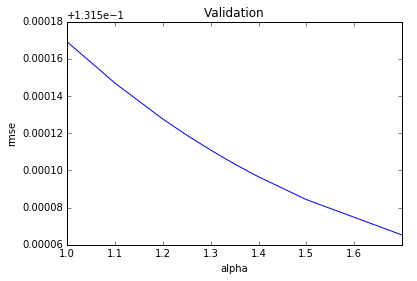

In [46]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [47]:
cv_ridge.min()

0.13156528310754312

In [48]:
from sklearn import linear_model
alpha = 1.32
rm = linear_model.Ridge(alpha=alpha)
ridge_model = rm.fit(X_train, y_train)

In [49]:
predictions = ridge_model.predict(X_test)
rsq = ridge_model.score(X_test, y_test)
rmse = mean_squared_error(y_test, predictions)
print ("R^2 is: \n",rsq)
print ('RMSE is: \n', rmse)

R^2 is: 
 0.910780424606
RMSE is: 
 0.0142443452314


### Lasso Model

In [50]:
# alphas = [0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
alphas=[0.1, 1.0, 10.0]
model_lasso = LassoCV(normalize=True).fit(X_train, y_train)

In [51]:
rmse_cv(model_lasso).mean()

0.13165115589511203

In [52]:
model_lasso.alpha_

6.3599693116197221e-05

In [53]:
predictions = model_lasso.predict(X_test)
rsq = model_lasso.score(X_test, y_test)
rmse = mean_squared_error(y_test, predictions)
print ("R^2 is: \n",rsq)
print ('RMSE is: \n', rmse)

R^2 is: 
 0.913553178269
RMSE is: 
 0.0138016614343


### Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_model = tree_reg.fit(X_train, y_train)

In [55]:
predictions = tree_model.predict(X_test)
rsq = tree_model.score(X_test, y_test)
rmse = mean_squared_error(y_test, predictions)
print ("R^2 is: \n",rsq)
print ('RMSE is: \n', rmse)

R^2 is: 
 0.714341763951
RMSE is: 
 0.0456067462158


### Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_model = forest_reg.fit(X_train, y_train)

In [57]:
predictions = forest_model.predict(X_test)
rsq = forest_model.score(X_test, y_test)
rmse = mean_squared_error(y_test, predictions)
print ("R^2 is: \n",rsq)
print ('RMSE is: \n', rmse)

R^2 is: 
 0.874782769411
RMSE is: 
 0.0199915484192


## Evaluate Model

## Create Submission

In [58]:
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model_lasso.predict(feats)
final_predictions = np.exp(predictions)

In [59]:
submission['SalePrice'] = final_predictions
submission.to_csv('submission1.csv', index=False)